In [1]:
import pandas as pd

data = pd.read_csv('data/chipotle.tsv', sep = '\t')

print(data.shape)
print('-----------------------')
print(data.info())

(4622, 5)
-----------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
order_id              4622 non-null int64
quantity              4622 non-null int64
item_name             4622 non-null object
choice_description    3376 non-null object
item_price            4622 non-null object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


- 4,622개의 행과 5개의 피처로 구성
- choice_desription에는 1,246개의 결측치가 존재

In [2]:
data.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [3]:
print(data.columns)
print('------------------------------------')
print(data.index)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')
------------------------------------
RangeIndex(start=0, stop=4622, step=1)


- order_id : 주문 번호
- quantity : 아이템의 주문 수량
- item_name : 주문한 아이템의 이름
- choice_description : 주문한 아이템의 상세 선택 옵션
- item_price : 주문 아이템의 가격 정보

In [4]:
# quantity와 item_price의 수치적 특징
# describe() 함수로 기초 통계량 출력하기

# order_id는 숫자의 의미를 가지지 않기 때문에 str으로 변환

data['order_id'] = data['order_id'].astype(str)
print(data.describe())

          quantity
count  4622.000000
mean      1.075725
std       0.410186
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max      15.000000


- 평균 주문 수량은 약 1.07, 이는 대부분 한 아이템에 대해서 1개 정도만 주문했다는 것이고, '한 사람이 같은 메뉴를 여러 개 구매하는 경우는 많지 않다.'는 인사이트를 얻을 수 있음.

In [5]:
print(len(data['order_id'].unique())) # order_id의 개수를 출력
print(len(data['item_name'].unique())) # item_name의 개수를 출력

1834
50


## 인사이트의 발견 : 탐색과 시각화하기

### 가장 많이 주문한 아이템 Top 10

In [6]:
# 가장 많이 주문한 아이템 Top 10 출력하기

item_count = data['item_name'].value_counts()[:10]
for idx, (val, cnt) in enumerate(item_count.iteritems(), 1):
    print('Top', idx, ':', val, cnt)

Top 1 : Chicken Bowl 726
Top 2 : Chicken Burrito 553
Top 3 : Chips and Guacamole 479
Top 4 : Steak Burrito 368
Top 5 : Canned Soft Drink 301
Top 6 : Steak Bowl 211
Top 7 : Chips 211
Top 8 : Bottled Water 162
Top 9 : Chicken Soft Tacos 115
Top 10 : Chips and Fresh Tomato Salsa 110


### 아이템별 주문 개수와 총량

In [7]:
# 아이템별 주문 개수 출력

order_count = data.groupby('item_name')['order_id'].count()
order_count[:10]

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

In [8]:
# 아이템별 주문 총량 계산

item_quantity = data.groupby('item_name')['quantity'].sum()
item_quantity[:10]

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

### 시각화

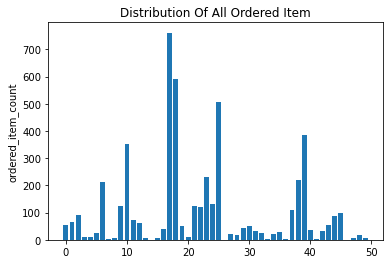

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

item_name_list = item_quantity.index.tolist()
x_pos = np.arange(len(item_name_list))
order_cnt = item_quantity.values.tolist()

plt.bar(x_pos, order_cnt, align = 'center')
plt.ylabel('ordered_item_count')
plt.title('Distribution Of All Ordered Item')

plt.show()

## 데이터 전처리

In [10]:
# item_price 피처 살펴보기

print(data.info())
print('-------------------')
data['item_price'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
order_id              4622 non-null object
quantity              4622 non-null int64
item_name             4622 non-null object
choice_description    3376 non-null object
item_price            4622 non-null object
dtypes: int64(1), object(4)
memory usage: 180.7+ KB
None
-------------------


0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

- 가격을 나타내는 숫자 앞에 기호가 붙어 있음. 따라서 이 피처를 수치 데이터로 사용하기 위해서는 기호를 제거해주는 전처리 작업이 필요

In [11]:
# apply()와 lambda를 이용해 데이터 전처리하기

data['item_price'] = data['item_price'].apply(lambda x : float(x[1:]))
data.describe()

,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


## EDA

### 주문당 평균 계산금액 출력하기

In [12]:
data.groupby('order_id')['item_price'].sum().mean()

18.811428571428717

### 한 주문에 10달러 이상 지불한 주문 번호(id) 출력하기

In [13]:
data_orderid_group = data.groupby('order_id').sum()
results = data_orderid_group[data_orderid_group['item_price'] >= 10]
print(results[:10])
print(results.index.values)

          quantity  item_price
order_id                      
1                4       11.56
10               2       13.20
100              2       10.08
1000             2       20.50
1001             2       10.08
1002             2       10.68
1003             2       13.00
1004             2       21.96
1005             3       12.15
1006             8       71.40
['1' '10' '100' ... '997' '998' '999']


### 각 아이템의 가격 구하기

In [15]:
data_one_item = data[data['quantity'] == 1] # 동일 아이템을 1개만 구매한 주문을 선별
price_per_item = data_one_item.groupby('item_name').min() # 각 그룹별 최저가 계산
price_per_item.sort_values(by = 'item_price', ascending = False)[:10] # item_price를 기준으로 정렬

,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,1032,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,1035,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,1011,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,1774,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Steak Soft Tacos,1054,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,1007,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,1103,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99


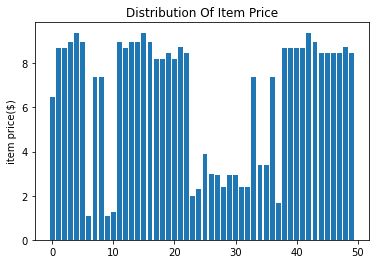

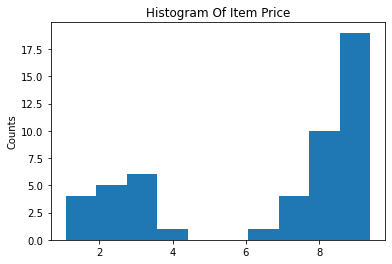

In [18]:
# 아이템 가격 분포 그래프 출력

item_name_list = price_per_item.index.tolist()
x_pos = np.arange(len(item_name_list))
item_price = price_per_item['item_price'].tolist()

plt.bar(x_pos, item_price, align = 'center')
plt.ylabel('item price($)')
plt.title('Distribution Of Item Price')
plt.show()

# 아이템 가격 히스토그램 출력
plt.hist(item_price)
plt.ylabel('Counts')
plt.title('Histogram Of Item Price')
plt.show()

### 가장 비싼 주문에서 아이템이 총 몇 개 팔렸는지 구하기

In [19]:
data.groupby('order_id').sum().sort_values(by = 'item_price', ascending = False)[:5]

,quantity,item_price
order_id,,
926,23,205.25
1443,35,160.74
1483,14,139.00
691,11,118.25
1786,20,114.30


### Veggie Salad Bowl이 몇 번 주문되었는지 구하기

In [20]:
data_salad = data[data['item_name'] == 'Veggie Salad Bowl']

data_salad = data_salad.drop_duplicates(['item_name', 'order_id'])

print(len(data_salad))
data_salad.head()

18


,order_id,quantity,item_name,choice_description,item_price
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


### Chicken Bowl을 2개 이상 주문한 주문 횟수 구하기

In [21]:
data_chicken = data[data['item_name'] == 'Chicken Bowl']
data_chicken_result = data_chicken[data_chicken['quantity'] >= 2]
print(data_chicken_result.shape[0])

33
